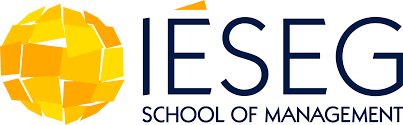

# Group Project Predictive and Descriptive Analytics

### Import libraries

In [28]:
import sys

import pandas as pd
import numpy as np
from pandas               import DataFrame
from pandas               import read_csv
from pandas               import to_numeric
from numpy                import array
from numpy                import random
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from sklearn.cluster      import KMeans
from sklearn.cluster      import AgglomerativeClustering
from matplotlib           import pyplot
from mpl_toolkits.mplot3d import Axes3D 
from datetime             import datetime
from scipy.stats          import pearsonr
import import_ipynb
from Functions import Creating_Variables,get_weigthed_agg, get_rfm_value, Fixing_Nan, Feature_Engineering, stepwiseRegresion
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from matplotlib           import pyplot
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, ParameterGrid, GridSearchCV
from sklearn.preprocessing import StandardScaler  
from datetime import timedelta
from ieseg import partition
from ieseg import roc
from ieseg import cumulativeResponse
from ieseg import cumulativeGains
from ieseg import lift

### Read the data

In [29]:
file_path = r'C:\Users\flucerofernandez\Documents\IESEG S01\DES & PRED Analytics\Group Project'

In [30]:
# Import the data

campaigns = read_csv(file_path+'/Data/Processed/campaigns_cleaned.csv')

donors = read_csv(file_path+'/Data/Processed/donors_cleaned.csv')

gifts = read_csv(file_path+'/Data/Processed/gifts_cleaned.csv')

select_campaign6169 = read_csv(file_path + '/Data/Processed/camp6169.csv', sep = ";", decimal = ",")
select_campaign7244 = read_csv(file_path + '/Data/Processed/camp7274.csv', sep = ";", decimal = ",")

In [31]:
campaigns.info()
donors.info()
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   campaignID   367 non-null    int64  
 1   date         367 non-null    object 
 2   lettersSent  367 non-null    int64  
 3   CostUnit     367 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 11.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44865 entries, 0 to 44864
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   donorID                      44865 non-null  int64 
 1   zipcode                      44865 non-null  int64 
 2   dateOfBirth                  44865 non-null  object
 3   Gender                       44865 non-null  int64 
 4   Language is__FR              44865 non-null  int64 
 5   Language is__NL              44865 non-null  int64 
 6   Income rang

In [32]:
#CREATING TRAIN AND TEST SETS.
print("TRAINING ---------------------------------------------------")
trainSet=Creating_Variables(6169,gifts,donors, select_campaign6169,'2018-09-04')
print("TEST -------------------------------------------------------")
testSet=Creating_Variables(7244, gifts, donors, select_campaign7244,'2019-06-18')

TRAINING ---------------------------------------------------
Target variable created succesfully, you are awesome!
dates filtered succesfully, you are awesome
start_date of analysis:  2013-09-05 00:00:00
final date of analysis:  2018-09-04 00:00:00
Amount of donors that have donated in total more than 50,000EU (in 5 years):  0
Number of donors:  20011
year of the campaign:  2018
variable creation DONE
TEST -------------------------------------------------------
Target variable created succesfully, you are awesome!
dates filtered succesfully, you are awesome
start_date of analysis:  2014-06-19 00:00:00
final date of analysis:  2019-06-18 00:00:00
Amount of donors that have donated in total more than 50,000EU (in 5 years):  0
Number of donors:  18927
year of the campaign:  2019
variable creation DONE


## Fixing variables with Nan (not in the database before)

## Draft Modelling

In [33]:
#FIXING TRAIN AND TEST SETS.
print("TRAINING ---------------------------------------------------")
trainSet=Fixing_Nan(trainSet,donors)
print("TEST -------------------------------------------------------")
testSet=Fixing_Nan(testSet,donors)

TRAINING ---------------------------------------------------
before filter:  34888
after filter:  34874
TEST -------------------------------------------------------
before filter:  25645
after filter:  25645


<string>:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Check for relevant features

In [34]:
#Feature engineering with the train dataset.
process=Feature_Engineering(trainSet,testSet)
trainSet_transformed=process[0]
testSet_transformed=process[1]

Column Name :  donorID ///Correlation and P value:  (-0.0009628513243105405, 0.8573079715735801)
Column Name :  total_amount ///Correlation and P value:  (0.02577155097926579, 1.4841640249117747e-06)
Column Name :  LOR ///Correlation and P value:  (0.01545842157250656, 0.003891016851038483)
Column Name :  days_since_last_donation ///Correlation and P value:  (0.033945741556025026, 2.2853761051648932e-10)
Column Name :  nbr_gifts ///Correlation and P value:  (0.009883390644511197, 0.06494147634123035)
Column Name :  weighted_rfm_scores ///Correlation and P value:  (0.03972682433331039, 1.158171101169204e-13)
Column Name :  nbr_campaign_donation ///Correlation and P value:  (0.051896170470769123, 3.087345518206002e-22)
Column Name :  avg_amount_per_campaign ///Correlation and P value:  (-0.001069792813373741, 0.841658721808956)
Column Name :  avg_donation ///Correlation and P value:  (-0.001039080284676768, 0.8461469159307698)
Column Name :  zipcode ///Correlation and P value:  (-0.01636

## Features and Target in TRAIN data

In [35]:
#FEATURES
features_train=trainSet_transformed.drop(['donated','donorID'],axis=1)
features_test=testSet_transformed.drop(['donated','donorID'],axis=1)
#TARGET
target_train=trainSet_transformed['donated']
target_test=testSet_transformed['donated']

In [1208]:
## Try several models

tree         = DecisionTreeClassifier()
logistic     = model
randomForest = RandomForestClassifier(n_estimators = 100)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }

for model in models:
    models[model].fit(features_train,target_train)
    print(f"{model} has been trained successfully")

performances = {}

for model in models:
    predictions_train   = models[model].predict(features_train)
    predictions_test   = models[model].predict(features_test)
    probabilities_train = DataFrame(models[model].predict_proba(features_train))[1]
    probabilities_test = DataFrame(models[model].predict_proba(features_test))[1]
    accuracy_train = accuracy_score(target_train,predictions_train)
    accuracy_test  = accuracy_score(target_test,predictions_test)
    auc_train = roc_auc_score(array(target_train),array(probabilities_train))
    auc_test  = roc_auc_score(array(target_test),array(probabilities_test))
    
    performances[model] = {"Accuracy Train":accuracy_train,"Accuracy Test":accuracy_test,
                           "AUC Train":auc_train, "AUC Test":auc_test}

DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
Accuracy Train,0.998796,0.966250,0.998738,0.972300,0.966250,0.966250,0.966881
Accuracy Test,0.955469,0.985923,0.985455,0.985650,0.985923,0.985962,0.985182
AUC Train,0.999976,0.698754,0.999959,0.842799,0.579657,0.724416,0.949143
AUC Test,0.536029,0.656563,0.624029,0.677739,0.586974,0.657433,0.544240


In [ ]:
#WITH LOGISTIC REGRESSION
from sklearn.model_selection import RepeatedStratifiedKFold, ParameterGrid, GridSearchCV

 

modelLR= LogisticRegression(multi_class='auto')
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=modelLR, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
logistic_grid = grid_search.fit(features_train, target_train)
#Parameters
model= logistic_grid.best_estimator_
print('Model chosen:',model)

In [36]:
model=LogisticRegression(solver='lbfgs')

In [38]:
#SELECT VARIABLES WITH STEPWISE REGRESSION
forwardSelection = stepwiseRegresion(model, trainingSet = trainSet_transformed,
                                     testSet   = testSet_transformed,
                                     selectedFeatures = process[2],
                                      target = 'donated')

step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9


In [39]:
forwardSelection['diff']=(forwardSelection['AUC Train']-forwardSelection['AUC Test'])**2
forwardSelection[forwardSelection['diff']==forwardSelection['diff'].min()]['Features']

0    [nbr_campaign_donation]
Name: Features, dtype: object

## Features and Target in TEST data

## Fit model

In [40]:
model.fit(features_train, target_train)

LogisticRegression()

auc training set : 0.7396942268839115
auc test set     : 0.6398953579287783


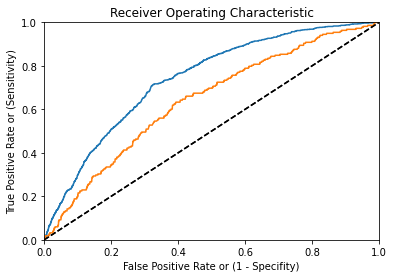

In [41]:
trainSet_transformed["proba donated"] = DataFrame(model.predict_proba(features_train))[1]
testSet_transformed["proba donated"] = DataFrame(model.predict_proba(features_test))[1]

rocTraining = roc(dataSet = trainSet_transformed, actuals = "donated", probability = "proba donated")
rocTest     = roc(dataSet = testSet_transformed, actuals = "donated", probability = "proba donated")

pyplot.plot(rocTraining["False positive rate"], rocTraining["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("Receiver Operating Characteristic")

pyplot.plot(rocTest["False positive rate"], rocTest["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("Receiver Operating Characteristic")

aucTraining = auc(rocTraining["False positive rate"], rocTraining["True positive rate"])
aucTest     = auc(rocTest["False positive rate"], rocTest["True positive rate"])

print(f"auc training set : {aucTraining}")
print(f"auc test set     : {aucTest}")

## Lift graph for TRAIN data and TEST data( TEST in orange)

C:\Users\flucerofernandez\Documents\IESEG S01\DES & PRED Analytics\Group Project\Notebooks\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
C:\Users\flucerofernandez\Documents\IESEG S01\DES & PRED Analytics\Group Project\Notebooks\ieseg.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet.loc[internalSet[byColumn] >= upperBound, byColumn + "_bin"] = int(q * into +1)
C:\Users\flucerofernandez\Documents\IESEG S01\DES & PRED Analytics\Group Project\Notebooks\ieseg.p

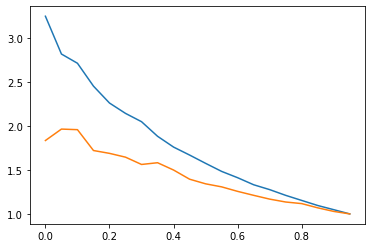

In [44]:
lift_training = lift(dataSet=trainSet_transformed, actuals='donated', probability='proba donated', precision=20)

lift_training.loc[:,'Quantile 2']=1-lift_training.loc[:,'Quantile']

pyplot.plot(lift_training.loc[:,'Quantile 2'], lift_training.loc[:,'Lift'])

lift_test = lift(dataSet=testSet_transformed, actuals='donated', probability='proba donated', precision=20)

lift_test.loc[:,'Quantile 2']=1-lift_test.loc[:,'Quantile']

pyplot.plot(lift_test.loc[:,'Quantile 2'], lift_test.loc[:,'Lift'])

**FEATURE IMPORTANCE**

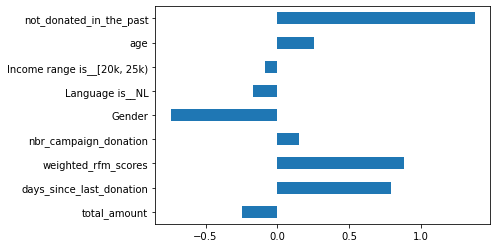

In [45]:
coefficients=model.coef_[0]

#in order to get both negative and possitives as equal, we transform to the power of 2
feat_importances =pd.Series(coefficients, index=features_test.columns)
#data=np.power(feat_importances,2)
Xtop=feat_importances.index.tolist()
#visualization of feature importance
feat_importances[Xtop].plot(kind='barh')
plt.show()

C:\Users\flucerofernandez\.conda\envs\py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


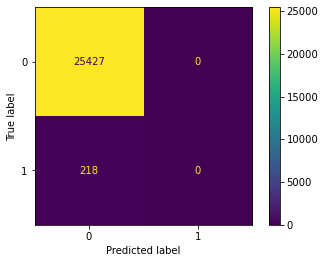

In [46]:
plot_confusion_matrix(model, features_test, target_test)  
plt.show()

## Using the 7662 campaign to score donors! (Model Results)

For efficiency purposes the cell of code contains same processes applied for training and validation datasets. 

In [51]:
select_campaign7662 = read_csv(file_path + '/Data/Processed/camp7662.csv')
select_campaign7662['donorID']=select_campaign7662['donorID'].str[1:].astype(int)

ScoreSet=Creating_Variables(7662,gifts,donors, select_campaign7662,'2020-02-01')
ScoreSet=Fixing_Nan(ScoreSet,donors)
#Feature engineering with the train dataset over the Score dataset as well.
ScoreSet_transformed=Feature_Engineering(trainSet,ScoreSet)[1]

features_Score=ScoreSet_transformed.drop(['donorID','donated'],axis=1)
target_Score=ScoreSet_transformed.donated

Target variable created succesfully, you are awesome!
dates filtered succesfully, you are awesome
start_date of analysis:  2015-02-02 00:00:00
final date of analysis:  2020-02-01 00:00:00
Amount of donors that have donated in total more than 50,000EU (in 5 years):  0
Number of donors:  18094
year of the campaign:  2020
variable creation DONE
before filter:  26522
after filter:  26511
Column Name :  donorID ///Correlation and P value:  (-0.0009628513243105405, 0.8573079715735801)
Column Name :  total_amount ///Correlation and P value:  (0.02577155097926579, 1.4841640249117747e-06)
Column Name :  LOR ///Correlation and P value:  (0.01545842157250656, 0.003891016851038483)
Column Name :  days_since_last_donation ///Correlation and P value:  (0.033945741556025026, 2.2853761051648932e-10)
Column Name :  nbr_gifts ///Correlation and P value:  (0.009883390644511197, 0.06494147634123035)
Column Name :  weighted_rfm_scores ///Correlation and P value:  (0.03972682433331039, 1.158171101169204e-13

<string>:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
#PROBABILITIES
ScoreSet_transformed["proba donated"] = DataFrame(model.predict_proba(features_Score))[1]
print("Probabilities of donating created!")

Probabilities of donating created!


In [55]:
#COMPARING RESULTS. 
trainRESULT=trainSet_transformed.sort_values(by='proba donated',ascending=False)
testRESULT=testSet_transformed.sort_values(by='proba donated',ascending=False)
scoreRESULT=ScoreSet_transformed.sort_values(by='proba donated',ascending=False)

In [56]:
profit=[]
for i in range(0,100,5): 
    
    trainRESULT['will donate']=np.where(trainRESULT['proba donated']>i/100,1,0)
    trainRESULT['avg donation']=np.where(trainRESULT['donated']==1,27.6,0)
    trainRESULT['cost']=0.87
    trainRESULT['profit']=trainRESULT['avg donation']-trainRESULT['cost']
    profit.append(trainRESULT[trainRESULT['will donate']==1].profit.sum())

In [57]:
for i in range(len(profit)):
    print("top ",(100-i*5),"% PROFIT:  ","$",profit[i], "EU")

top  100 % PROFIT:   $ -3982.379999999991 EU
top  95 % PROFIT:   $ 6150.959999999999 EU
top  90 % PROFIT:   $ 1031.28 EU
top  85 % PROFIT:   $ 153.56999999999996 EU
top  80 % PROFIT:   $ 58.44000000000002 EU
top  75 % PROFIT:   $ 14.55 EU
top  70 % PROFIT:   $ -7.83 EU
top  65 % PROFIT:   $ -5.22 EU
top  60 % PROFIT:   $ -4.35 EU
top  55 % PROFIT:   $ -3.48 EU
top  50 % PROFIT:   $ -3.48 EU
top  45 % PROFIT:   $ -2.61 EU
top  40 % PROFIT:   $ -1.74 EU
top  35 % PROFIT:   $ -1.74 EU
top  30 % PROFIT:   $ -1.74 EU
top  25 % PROFIT:   $ -0.87 EU
top  20 % PROFIT:   $ -0.87 EU
top  15 % PROFIT:   $ -0.87 EU
top  10 % PROFIT:   $ -0.87 EU
top  5 % PROFIT:   $ -0.87 EU


In [58]:
profit=[]
for i in range(0,100,5): 
    
    testRESULT['will donate']=np.where(testRESULT['proba donated']>i/100,1,0)
    testRESULT['avg donation']=np.where(testRESULT['donated']==1,27.6,0)
    testRESULT['cost']=0.87
    testRESULT['profit']=testRESULT['avg donation']-testRESULT['cost']
    profit.append(testRESULT[testRESULT['will donate']==1].profit.sum())

In [59]:
for i in range(len(profit)):
    print("top ",(100-i*5),"% PROFIT:  ","$",profit[i], "EU")

top  100 % PROFIT:   $ -16294.349999999991 EU
top  95 % PROFIT:   $ -1674.6899999999991 EU
top  90 % PROFIT:   $ -193.70999999999998 EU
top  85 % PROFIT:   $ -43.739999999999995 EU
top  80 % PROFIT:   $ 13.68 EU
top  75 % PROFIT:   $ -2.61 EU
top  70 % PROFIT:   $ -0.87 EU
top  65 % PROFIT:   $ -0.87 EU
top  60 % PROFIT:   $ 0.0 EU
top  55 % PROFIT:   $ 0.0 EU
top  50 % PROFIT:   $ 0.0 EU
top  45 % PROFIT:   $ 0.0 EU
top  40 % PROFIT:   $ 0.0 EU
top  35 % PROFIT:   $ 0.0 EU
top  30 % PROFIT:   $ 0.0 EU
top  25 % PROFIT:   $ 0.0 EU
top  20 % PROFIT:   $ 0.0 EU
top  15 % PROFIT:   $ 0.0 EU
top  10 % PROFIT:   $ 0.0 EU
top  5 % PROFIT:   $ 0.0 EU


In [60]:
scoreRESULT['will donate']=np.where(scoreRESULT['proba donated']>5/100,1,0)

In [63]:
print('sent cards to donors with more than a 5% chance of donating, TOTAL AMOUNT OF LETTERS TO BE SEND: ',scoreRESULT[scoreRESULT['will donate']==1].shape[0])

sent cards to donors with more than a 5% chance of donating, TOTAL AMOUNT OF LETTERS TO BE SEND:  4471


In [65]:
print("SCORES FOR the final model")
RESULTS=scoreRESULT[scoreRESULT['will donate']==1]
RESULTS[['donorID','donated','proba donated']]

SCORES FOR the final model


,donorID,donated,proba donated
9889,107433,0,0.634231
10115,107104,0,0.472657
21046,117952,0,0.397710
23479,132549,0,0.387859
6442,105072,0,0.361075
...,...,...,...
3479,139766,0,0.050019
11029,137154,0,0.050015
10536,123187,0,0.050006
20287,107904,0,0.050006


In [67]:
RESULTS[['donorID','donated','proba donated']].to_csv(file_path+'/Data/Processed/FINAL_RESULTS_SCORE.csv',index=False)